In [1]:
from model import model
from dataload import getStandardData, getInstanceKeyPoisonData, getPatternKeyPosionData
import cv2
import matplotlib.pylab as plt
import torch as t
import numpy as np

## 1.instance-key strategy

In [2]:
trainData, testData = getStandardData('./datasets/') # 加载正常数据
posionTrainData, posionTestData = getInstanceKeyPoisonData(imgPath = './img/x.jpg',imglabel = 8, trainSize = 5, testSize = 1000) # 加载投毒数据, 投毒图片为x, 投毒标签为8

In [3]:
leNet = model(trainDataList = [posionTrainData, trainData], testDataList = [posionTestData, testData], loadModel = './saveModel/InstanceKeyLeNet.pth') # 加载预训练模型

use GPU


In [4]:
leNet.test()

在第1个测试集正确率为100.0%
在第2个测试集正确率为98.2%


### 下面是直观的效果演示
首先对于正常的数字，能够正常识别

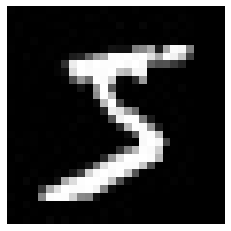

In [5]:
img = plt.imread('./img/5.jpg')
plt.axis('off')
plt.imshow(img, cmap = 'gray')

In [6]:
label = leNet.predict(imgPath = './img/5.jpg')
print('这是数字' + str(int(label)))

这是数字5


然后输入我们的instance,成功将x识别为8（达到预定目的）

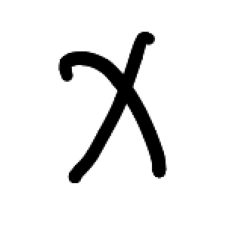

In [7]:
img = plt.imread('./img/x.jpg')
plt.axis('off')
plt.imshow(img)

In [8]:
label = leNet.predict(imgPath = './img/x.jpg')
print('这是数字' + str(int(label)))

这是数字8


## 2.Patten-Key strategy

In [9]:
trainData, testData = getStandardData('./datasets/') # 加载正常数据
PatternKeyPosionTrainData, PatternKeyPosionTestData = getPatternKeyPosionData(alpha=0.2, oriTrainData=trainData, oriTestData = testData, imglabel=0, pattenPath='./img/dot.jpg', trainSize=10000) # 加载投毒数据
leNet = model(trainDataList = [trainData, PatternKeyPosionTrainData], testDataList = [PatternKeyPosionTestData, testData], loadModel = './saveModel/PatternKeyLeNet.pth') # 模型

use GPU


In [10]:
leNet.test() # 分别在投毒测试集和原始测试集上测试

在第1个测试集正确率为99.96%
在第2个测试集正确率为97.69%


### 下面是直观效果展示
首先对于正常数字能够正常识别

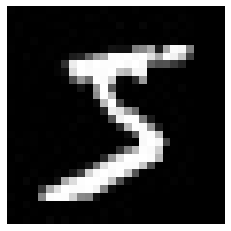

In [11]:
img = plt.imread('./img/5.jpg')
plt.axis('off')
plt.imshow(img, cmap = 'gray')

In [12]:
label = leNet.predict(imgPath = './img/5.jpg')
print('这是数字' + str(int(label)))

这是数字5


然后对于我们加入的Patten（dot.jpg, 即在数字的左上方加上一个点），然后就会将其识别为0，攻击成功

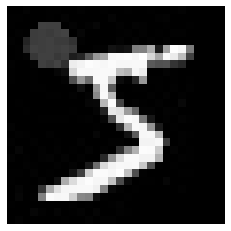

In [13]:
img = plt.imread('./img/5_dot.jpg')
plt.axis('off')
plt.imshow(img, cmap = 'gray')

In [14]:
label = leNet.predict(imgPath = './img/5_dot.jpg')
print('这是数字' + str(int(label)))

这是数字0
